In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
loan=pd.read_csv('/content/drive/MyDrive/AIML/Lending Club Case Study_28-06-23/After session/loan.csv')
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<ipython-input-2-4c522a67a039>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan=pd.read_csv('/content/drive/MyDrive/AIML/Lending Club Case Study_28-06-23/After session/loan.csv')


In [3]:
loan.shape

(39717, 111)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
loan.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [7]:
#Cleaning of the Data
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
mis_columns=loan.columns[loan.isnull().sum()>30000]
print(mis_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
df=loan.drop(mis_columns,axis=1)

In [10]:
df.shape

(39717, 55)

In [11]:
len(df[df.isnull().sum(axis=1)>5].index)

4

In [12]:
df=df.drop(df[df.isnull().sum(axis=1)>5].index)

In [13]:
#df['int_rate']=df['int_rate'].apply(lambda x:pd.to_numeric(x.split('%')[0]))

In [14]:
df=df[~df['emp_length'].isnull()]

In [15]:
import re

df['emp_length']=df['emp_length'].apply(lambda x:re.findall('\d+',str(x))[0])

In [16]:
df['emp_length']=df['emp_length'].apply(lambda x:pd.to_numeric(x))

In [17]:
df['loan_status'].value_counts()

Fully Paid     32141
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [102]:
df1=df[df['loan_status']!='Current']
df3=df1

In [19]:
df1['loan_status']=df1['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
df1['loan_status']=df1['loan_status'].apply(lambda x:pd.to_numeric(x))

<ipython-input-19-7214be3c8d98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan_status']=df1['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
<ipython-input-19-7214be3c8d98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan_status']=df1['loan_status'].apply(lambda x:pd.to_numeric(x))


In [53]:
df1_filtered = df1[df1['dti'] > 0]  # Filter out rows with dti > 0
df1_filtered['dti_log'] = np.log(df1_filtered['dti'])

<ipython-input-53-3d40d4abde4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['dti_log'] = np.log(df1_filtered['dti'])


In [ ]:
#df1['debt_to_income_ratio']= 12*(df1['total_debt_payments'] / df1['annual_inc']).fillna(0)

In [27]:
import datetime

# Assuming you have a DataFrame named df5 with a column named 'date_column' containing dates in the format '01/12/2011'

# Convert the 'date_column' to datetime format
df1['date_column'] = pd.to_datetime(df1['issue_d'], format='%b-%y')

# Extract the month from the 'date_column'
df1['month'] = df1['date_column'].dt.month
df1['year'] = df1['date_column'].dt.year
# Print the resulting DataFrame with the month column
print(df1[['date_column', 'month','year']])

      date_column  month  year
0      2011-12-01     12  2011
1      2011-12-01     12  2011
2      2011-12-01     12  2011
3      2011-12-01     12  2011
5      2011-12-01     12  2011
...           ...    ...   ...
39710  2007-07-01      7  2007
39711  2007-07-01      7  2007
39712  2007-07-01      7  2007
39713  2007-07-01      7  2007
39716  2007-06-01      6  2007

[37540 rows x 3 columns]


<ipython-input-27-d3b0846c607c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date_column'] = pd.to_datetime(df1['issue_d'], format='%b-%y')
<ipython-input-27-d3b0846c607c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['date_column'].dt.month
<ipython-input-27-d3b0846c607c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

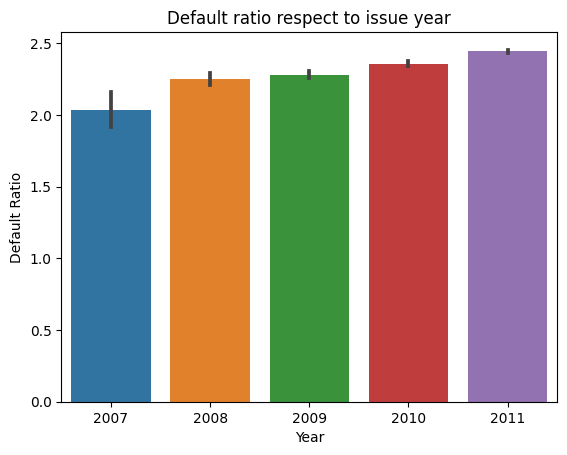

In [114]:
sns.barplot(x='year',y='dti_log',data=df1_filtered)
plt.title('Default ratio respect to issue year')
plt.xlabel('Year')
plt.ylabel('Default Ratio')
plt.show()

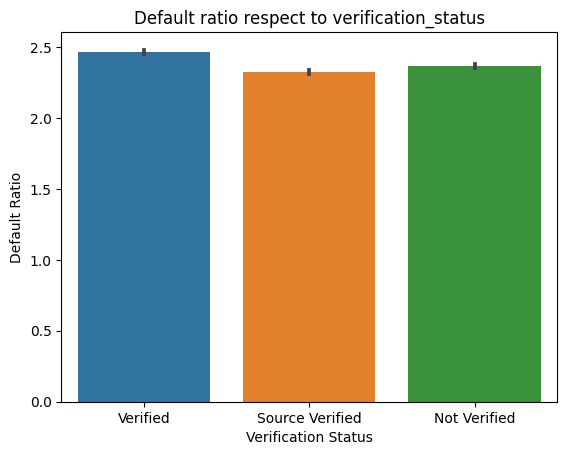

In [56]:
sns.barplot(x='verification_status',y='dti_log',data=df1_filtered)
plt.title('Default ratio respect to verification_status')
plt.xlabel('Verification Status')
plt.ylabel('Default Ratio')
plt.show()

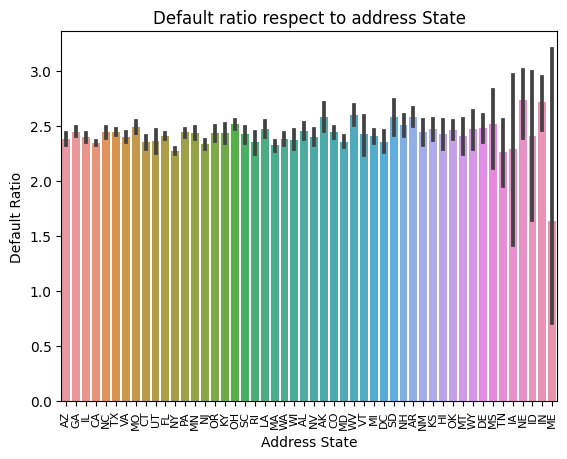

In [55]:
sns.barplot(x='addr_state',y='dti_log',data=df1_filtered)
plt.title('Default ratio respect to address State')
plt.xlabel('Address State')
plt.ylabel('Default Ratio')
#plt.figure(figsize=(15, 10))
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.show()

In [44]:
df1['Emp_len']=loan['emp_length']

<ipython-input-44-66d05356370f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Emp_len']=loan['emp_length']


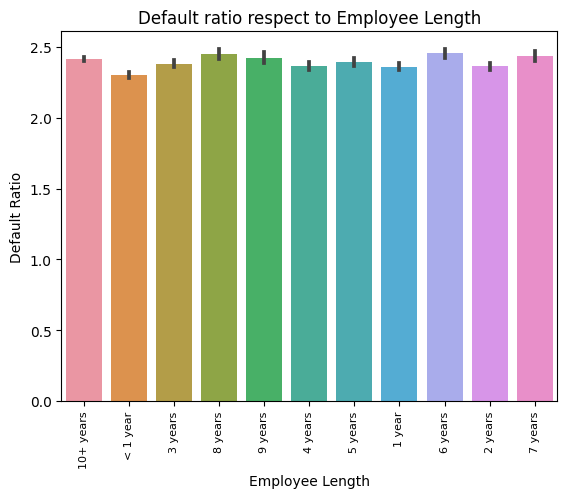

In [50]:

sns.barplot(x='Emp_len', y='dti_log', data=df1_filtered)
plt.title('Default ratio respect to Employee Length')
plt.xlabel('Employee Length')
plt.ylabel('Default Ratio')
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', labelsize=8)

plt.show()

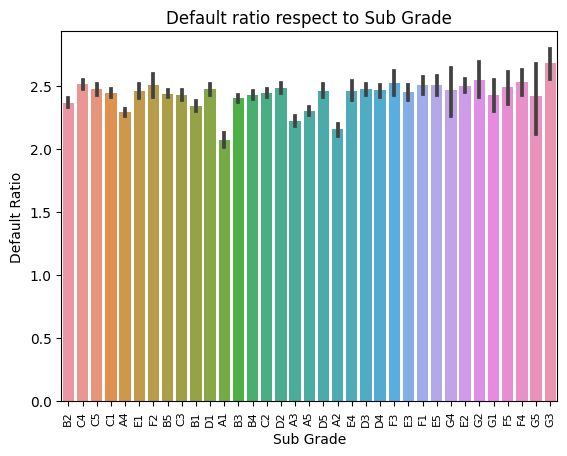

In [65]:
sns.barplot(x='sub_grade', y='dti_log', data=df1_filtered)
plt.title('Default ratio respect to Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Default Ratio')
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', labelsize=8)

plt.show()

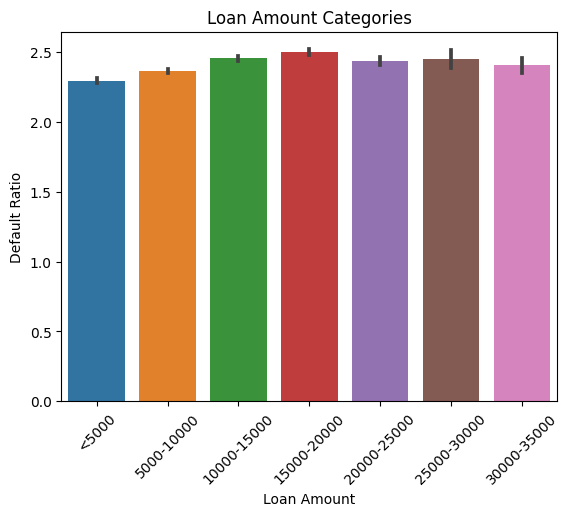

In [88]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

categories = ['<5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000']

# Create a new column for loan amount categories
df1_filtered.loc[:, 'loan_amount_category'] = pd.cut(df1_filtered['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=categories)

# Plot the categorized loan amounts
sns.barplot(x='loan_amount_category', y='dti_log', data=df1_filtered)

# Customize the plot
plt.xlabel('Loan Amount')
plt.ylabel('Default Ratio')
plt.title('Loan Amount Categories')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

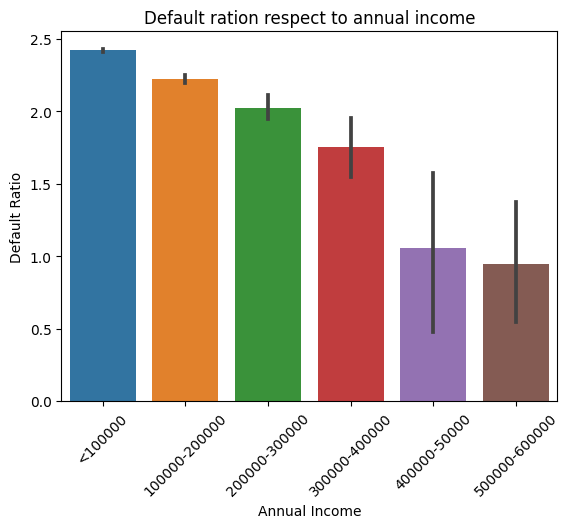

In [89]:
categories_i= ['<100000', '100000-200000', '200000-300000', '300000-400000', '400000-50000', '500000-600000']
df1_filtered['annual_inc_category'] = pd.cut(df1_filtered['annual_inc'], bins=[0,100000,200000, 300000, 400000,500000,600000], labels=categories_i)


sns.barplot(x='annual_inc_category', y='dti_log', data=df1_filtered)

# Customize the plot
plt.xlabel('Annual Income')
plt.ylabel('Default Ratio')
plt.title('Default ration respect to annual income')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [84]:
df1_filtered['annual_inc'].max()

6000000.0

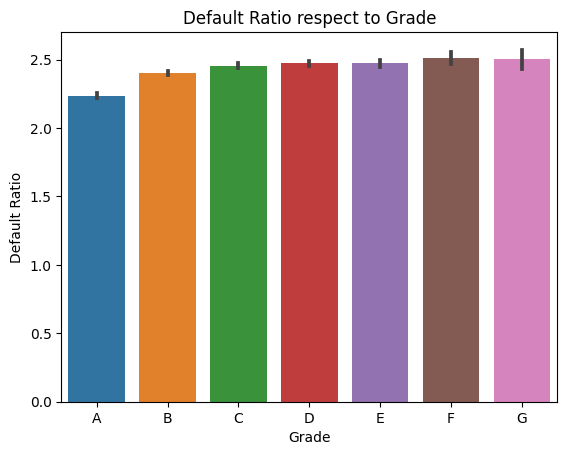

In [93]:
# Sort the 'grade' column in alphabetical order
sorted_grades = sorted(df1_filtered['grade'].unique())

# Create the bar plot using sorted grades
sns.barplot(x='grade', y='dti_log', data=df1_filtered, order=sorted_grades)

# Customize the plot
plt.xlabel('Grade')
plt.ylabel('Default Ratio')
plt.title('Default Ratio respect to Grade')


# Display the plot
plt.show()

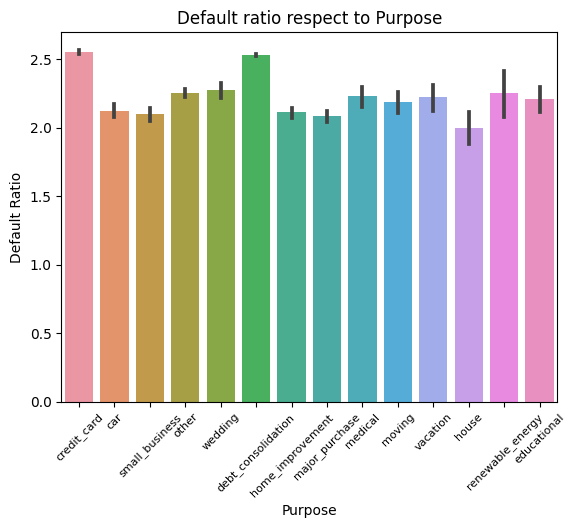

In [95]:
sns.barplot(x='purpose', y='dti_log', data=df1_filtered)
plt.title('Default ratio respect to Purpose')
plt.xlabel('Purpose')
plt.ylabel('Default Ratio')
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=8)


plt.show()

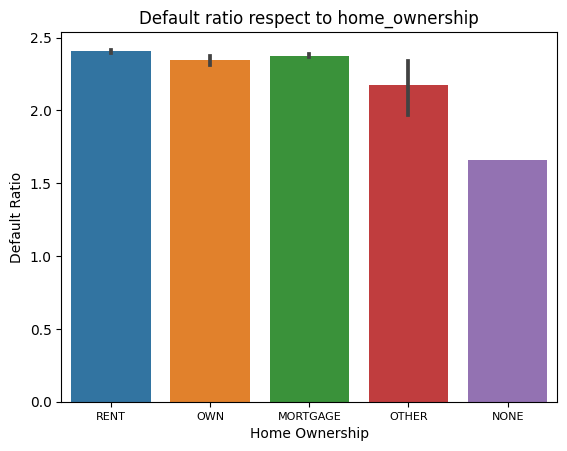

In [97]:
sns.barplot(x='home_ownership', y='dti_log', data=df1_filtered)
plt.title('Default ratio respect to home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Default Ratio')
#plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=8)


plt.show()

In [116]:
df3['int_rate'] = df3['int_rate'].str.rstrip('%').astype(float)

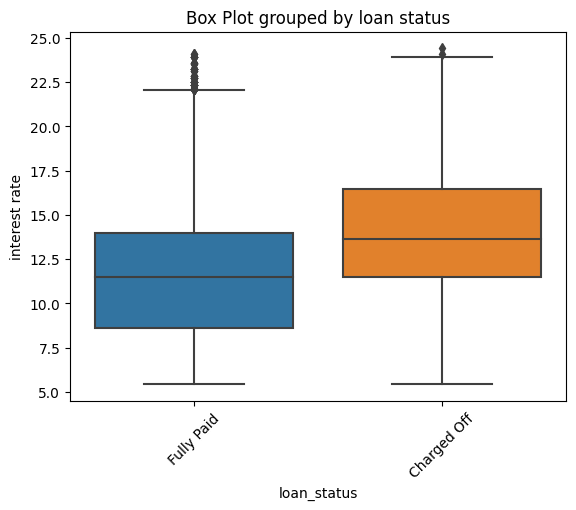

In [117]:

# Create a box plot
sns.boxplot(x='loan_status', y='int_rate', data=df3)

# Customize the plot
plt.xlabel('loan_status')
plt.ylabel('interest rate')
plt.title('Box Plot grouped by loan status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [103]:
df3['int_rate'].info

<bound method Series.info of 0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39710     7.43%
39711     8.70%
39712     8.07%
39713    10.28%
39716    13.75%
Name: int_rate, Length: 37540, dtype: object>